In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import win32file
win32file._setmaxstdio(2048)

2048

In [2]:
# Load data
# PER_data_folder = 'PER'
NER_folder = r'D:\NER\fintech-assignments\hw2_NER'
PER_data_folder = os.path.join(NER_folder, 'PER')
df = pd.read_csv(os.path.join(PER_data_folder, 'news_data_with_PER.csv'))

In [3]:
low_risk_keywords = ["人口販運", "性剝削", "兒童", "偽造貨幣", "殺人", "重傷害", "搶奪", "勒贖", "海盜", "恐怖主義", "資恐"]
medium_risk_keywords = ["非法販賣武器", "贓物", "竊盜", "綁架", "拘禁", "妨害自由", "環保犯罪", "偽造文書"]
high_risk_keywords = ["仿冒", "盜版", "侵害營業秘密"]
exhigh_risk_keywords = ["毒品販運", "詐欺", "走私", "稅務犯罪", "組織犯罪", "證券犯罪", "貪汙賄賂", "第三方洗錢"]
all_keywords = list(low_risk_keywords + medium_risk_keywords + high_risk_keywords + exhigh_risk_keywords)


# Reduce data - choose only exhigh_risk_risk_keywords for demo
df = df[df['keywords'].isin(exhigh_risk_keywords)]

In [4]:
df.head()

,news,keywords,title,link,content,content_cn,PER
5928,appledaily,毒品販運,身藏8百萬毒品闖關香港機場2台男遭逮補｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,香港國際機場海關人員，周一(15日)在機場截查由柬埔寨金邊飛抵香港的2名台灣籍旅客，2人在清...,香港国际机场海关人员，周一(15日)在机场截查由柬埔寨金边飞抵香港的2名台湾籍旅客，2人在清...,周一(
5929,appledaily,毒品販運,3代販毒7歲孫淪毒蟲｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/appledaily/articl...,【石明啟╱桃園報導】真夭壽！竟有阿嬤讓才國中畢業和念小一的兩個孫女吸毒，更利用她們販毒。警方...,【石明启╱桃园报导】真夭寿！竟有阿嬷让才国中毕业和念小一的两个孙女吸毒，更利用她们贩毒。警方...,"【石明,】真,阿嬷让,阿嬷,阿嬷"
5930,appledaily,毒品販運,台灣首見相思木煉9億毒品｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/appledaily/articl...,【劉文淵╱台北報導】相思木竟然也可製毒！刑事局昨破獲台灣首例由相思木提煉迷幻藥的毒品案，父子...,【刘文渊╱台北报导】相思木竟然也可制毒！刑事局昨破获台湾首例由相思木提炼迷幻药的毒品案，父子...,【刘文渊
5931,appledaily,毒品販運,​吸毒者最大的麻煩不是毒品｜蘋果新聞網｜蘋果日報,http://www.appledaily.com.tw/realtimenews/arti...,陳宏彬／世新大學口語傳播科系二年級 日前坦承吸食大麻的「BIGBANG」成員T.O.P，在6...,陈宏彬／世新大学口语传播科系二年级 日前坦承吸食大麻的「BIGBANG」成员T.O.P，在6...,"陈宏彬,哲曾"
5932,appledaily,毒品販運,台灣怎麼會淪為運毒島？｜蘋果新聞網｜蘋果日報https://,https://www.appledaily.com.tw/realtimenews/art...,徐立德／退休社會工作者台灣的詐騙集團猖獗，在國際間「知名」，現在台灣繼「騙很大」之後，又多出...,徐立德／退休社会工作者台湾的诈骗集团猖獗，在国际间「知名」，现在台湾继「骗很大」之后，又多出...,徐立德


In [5]:
# Iterate through each news and store in dictionary
News_Dictionary = {}
Crime_All = set()
Person_All = set()

for index, row in df.iterrows():
    crime = row['keywords']
    Crime_All.add(crime)
    
    if type(row['PER']) == str:
        person_list = row['PER'].split(',')
    else:
        person_list = []
    
    """ ckipner 
    
    ckipner = row['PER_ckip']
    if type(ckipner) == str:
        person_list = ckipner[ckipner.find("[")+2: ckipner.find("]")-1].split("', '")
    else:
        person_list = []
    """
    
    Person_All = Person_All.union(set(person_list))
    
    Crime_Person_list = person_list + [crime]
    News_Dictionary[str(index)] = list(set(Crime_Person_list))
    
# Create list with all crimes and people  
Crime_Person_All = Crime_All.union(Person_All)
Crime_Person_All = list(Crime_Person_All)    

print('News_Dictionary:', News_Dictionary, '\n')
print('Crime_Person_All:', Crime_Person_All)

News_Dictionary: {'5928': ['周一(', '毒品販運'], '5929': ['】真', '阿嬷', '【石明', '阿嬷让', '毒品販運'], '5930': ['【刘文渊', '毒品販運'], '5931': ['陈宏彬', '毒品販運', '哲曾'], '5932': ['毒品販運', '徐立德'], '5933': ['毒品販運', '荣海运', '【林海'], '5934': ['林男', '毒品販運', '陈男和'], '5935': ['陈明哲', '蔡详忠', '陈', '李政远', '毒品販運', '叶'], '5936': ['毒品販運'], '5937': ['陈恒泰', '程虹臻', '【林静盛╱', '李家豪', '毒品販運'], '5938': ['罗智强', '柯建铭', '李宪章', '蔡英文', '黄国昌', '葛军', '何哲欣', '毒品販運', '陈菊'], '5939': ['刘文渊', 'Joko Widodo', '杜特蒂', '毒品販運', '佐科威'], '5940': ['王子荣', '佛洛斯特', '毒品販運'], '5941': ['毒品販運'], '5942': ['蔡志鸿', '孙志峰', '孙国泰', '郭春源', '庄金生', '毒品販運', '陈威全', '徐勇立', '廖冠宇'], '5943': ['胡意刚', '陈男坦', '邱太三', '陈男现', '朱锡勇', '林佳龙', '陈', '林子', '陈嘉昌', '陈男船', '陈志善', '林长明', '李瑞玉', '毒品販運', '邱'], '5944': ['谢政利', '毒品販運', '╱新竹'], '5945': ['陈君毅', '毒品販運'], '5946': ['高吉祥', '毒品販運', '庄淇钧', '韩'], '5947': ['杨嫌特', '杨嫌天', '杨', '苏保安', '花莲', '毒品販運', '李', '杨嫌'], '5948': ['刘文渊', '毒品販運'], '5949': ['罗森斯坦', '张', '周二召', '卢宥竹', '毒品販運'], '5950': ['毒品販運'], '5951': ['张君豪', '\u200b\u200b', '张嫌', '\u200b\u2

In [6]:
del df

In [7]:
# Set base df_co (co-occurance matrix)
df_co = pd.DataFrame(columns = Crime_Person_All, index = Crime_Person_All)
df_co[:] = 0

news_amount = len(News_Dictionary.keys())
print('news_amount', news_amount)

# Iterate through each news and add one for each Crime_Person-Crime_Person relationship
#-> In this case, relationship equates to appearing in the same news
n = 0
for value in News_Dictionary.values():
    for item1 in value:
        for item2 in value:
            df_co[item1][item2] += 1
            df_co[item2][item1] += 1
    if n % 1000 == 0:
        print('Finish edge_list:', n)
    n += 1

df_co.head(20)

news_amount 2117
Finish edge_list: 0
Finish edge_list: 1000
Finish edge_list: 2000


,,彭马润,欧鸿,廖昌禧,廖男吞,杨智清,娜塔莎,Joko Widodo,戴女,林立腾,...,柯格钟,林清,林崇成,麦克」,许超凡,许虞哲,许丰旸,王侦查,叶男针,林嘉凌
,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
彭马润,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
欧鸿,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
廖昌禧,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
廖男吞,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
杨智清,0,0,0,0,0,2,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
娜塔莎,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Joko Widodo,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
戴女,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
林立腾,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add weights to edges
items_amount = len(Crime_Person_All)
print('items_amount', items_amount)

n = 0
edge_list = []                         # test networkx
for index, row in df_co.iterrows():
    i = 0
    for col in row:
        weight = float(col)             # Set weight - delete /464
        if weight != 0:                 # Remove edge if 0.0
                edge_list.append((index, df_co.columns[i], weight))
        i += 1
    if n % 1000 == 0:
        print('Finish edge_list:', n)
    n += 1
    
# print('edge_list', edge_list, '\n')

items_amount 5017
Finish edge_list: 0
Finish edge_list: 1000
Finish edge_list: 2000
Finish edge_list: 3000
Finish edge_list: 4000
Finish edge_list: 5000


In [11]:
# Create node for crime_or_person occurance in news
n = 0
node_list = []
max_occurrence = 0
for i in Crime_Person_All:
    for e in edge_list:
        if i == e[0] and i == e[1]:
            node_list.append((i, e[2]))    # Set for the size of circles -  delete 6
            if e[2] > max_occurrence:
                max_occurrence = e[2]
    if n % 1000 == 0:
        print('Finish node_list:', n)
    n += 1

print('max_occurrence', max_occurrence)
# print('node_list', node_list)

Finish node_list: 0
Finish node_list: 1000
Finish node_list: 2000
Finish node_list: 3000
Finish node_list: 4000
Finish node_list: 5000
max_occurrence 566.0


In [12]:
# Remove self references
n = 0
for i in edge_list:
    if i[0] == i[1]:
        edge_list.remove(i)
    if n % 10000 == 0:
        print('Finish edge_list:', n)
    n += 1

# print('edge_list', edge_list, '\n')

Finish edge_list: 0
Finish edge_list: 1000
Finish edge_list: 2000
Finish edge_list: 3000
Finish edge_list: 4000
Finish edge_list: 5000
Finish edge_list: 6000
Finish edge_list: 7000
Finish edge_list: 8000
Finish edge_list: 9000
Finish edge_list: 10000
Finish edge_list: 11000
Finish edge_list: 12000
Finish edge_list: 13000
Finish edge_list: 14000
Finish edge_list: 15000
Finish edge_list: 16000
Finish edge_list: 17000
Finish edge_list: 18000
Finish edge_list: 19000
Finish edge_list: 20000
Finish edge_list: 21000
Finish edge_list: 22000
Finish edge_list: 23000
Finish edge_list: 24000
Finish edge_list: 25000
Finish edge_list: 26000
Finish edge_list: 27000
Finish edge_list: 28000
Finish edge_list: 29000
Finish edge_list: 30000
Finish edge_list: 31000
Finish edge_list: 32000
Finish edge_list: 33000
Finish edge_list: 34000
Finish edge_list: 35000
Finish edge_list: 36000
Finish edge_list: 37000
Finish edge_list: 38000
Finish edge_list: 39000
Finish edge_list: 40000
Finish edge_list: 41000
Finis

In [ ]:
#

In [13]:
# Networkx graph time!
import matplotlib.font_manager as fm
Fond_path = r'C:\Windows\Fonts\kaiu.ttf'
fp1 = fm.FontProperties(fname = Fond_path)
nx.set_fontproperties(fp1)
G = nx.Graph()
# nx.draw(G, with_labels=True)

n = 0
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
    
    if n % 1000 == 0:
        print('Finish node_list:', n)
    n += 1
G.add_weighted_edges_from(edge_list)

# Check data of graphs
# print('G.nodes', G.nodes(data = True), '\n')
# print('G.edges', G.edges(data = True))

Finish node_list: 0
Finish node_list: 1000
Finish node_list: 2000
Finish node_list: 3000
Finish node_list: 4000
Finish node_list: 5000


In [14]:
# Listing out the order of nodes for future work
node_order = list(nx.nodes(G))

# Reorder node list
n = 0
updated_node_list = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_list.append(x)
    if n % 1000 == 0:
        print('Finish node_list:', n)
    n += 1

# print('updated_node_list:', updated_node_list, '\n')

Finish node_list: 0
Finish node_list: 1000
Finish node_list: 2000
Finish node_list: 3000
Finish node_list: 4000
Finish node_list: 5000


In [15]:
# Reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
n = 0
updated_edge_list = []
for i in nx.edges(G):
    for x in test.keys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_edge_list.append(test[x])
    if n % 10000 == 0:
        print('Finish node_list:', n)
    n += 1

# print('updated_edge_list:', updated_edge_list)

Finish node_list: 0
Finish node_list: 10000
Finish node_list: 20000
Finish node_list: 30000


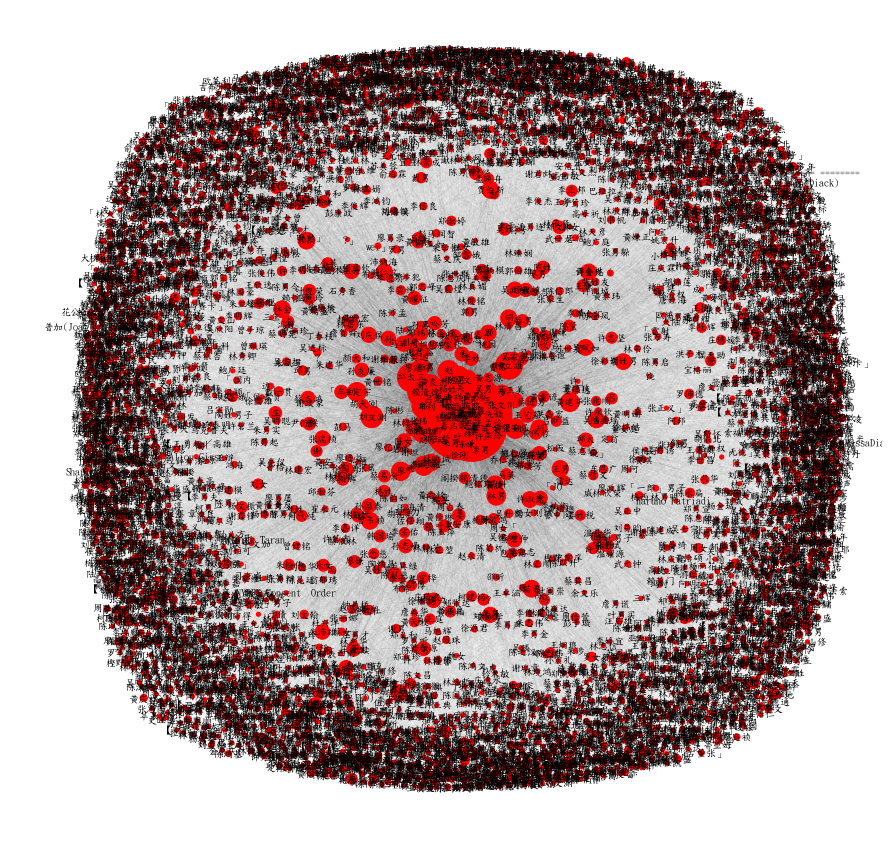

In [22]:
# Set canvas size
plt.subplots(figsize=(15,15))

# Drawing custimization
node_scalar = 5000/max_occurrence    # Set node_scalar
edge_scalar = 1/max_occurrence        # Set edge_scalar
sizes = [x[1]*node_scalar for x in updated_node_list]
widths = [x*edge_scalar for x in updated_edge_list]

# Draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw(G, pos, with_labels=True, font_size = 8, font_weight = 'bold', 
        node_size = sizes, width = widths)

# Save as png
output_file = os.path.join(NER_folder, 'imgs', 'co-occurrence_diagram.png')   
k = 1
while(1):
    if not os.path.exists(output_file):
        plt.axis('off')
        plt.savefig(output_file)
        break
    else:
        k += 1
        output_file = os.path.join(NER_folder, 'imgs', 'co-occurrence_diagram_' + str(k) + '.png') 

In [24]:
output_file = os.path.join(NER_folder, 'co-occurrence_csv', 'co-occurrence_matrix.csv')
k = 1
while(1):
    if not os.path.exists(output_file): 
        df_co.to_csv(output_file)
        break
    else:
        k += 1
        output_file = os.path.join(NER_folder, 'co-occurrence_csv', 'co-occurrence_matrix_' + str(k) + '.csv') 